# Part 2

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## PCA

In [96]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline 
np.random.seed = 1
N = 1000
fs = 500
w = np.arange(1,N+1) * 2 * np.pi/fs
t = np.arange(1,N+1)/fs
x = 0.75 * np.sin(w*5)
y = signal.sawtooth(w*7, 0.5)
d1 = 0.5*y   + 0.5*x   + 0.1*np.random.rand(1,N)
d2 = 0.2*y   + 0.75*x  + 0.15*np.random.rand(1,N)
d3 = 0.7*y   + 0.25*x  + 0.1*np.random.rand(1,N)
d4 = -0.5*y  + 0.4*x   + 0.2*np.random.rand(1,N)
d5 = 0.6*np.random.rand(1,N)


d1 = d1 - d1.mean()
d2 = d2 - d2.mean()
d3 = d3 - d3.mean()
d4 = d4 - d4.mean()
d5 = d5 - d5.mean()




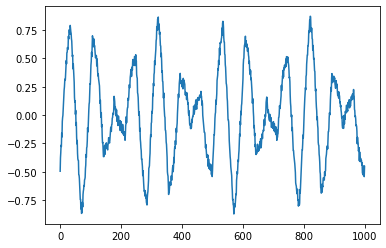

In [97]:
plt.plot(d1.transpose())

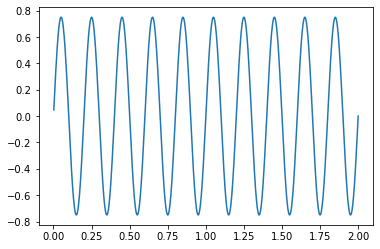

In [98]:
plt.plot(t, x)

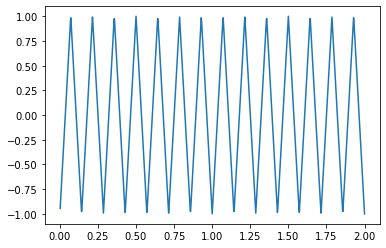

In [99]:
plt.plot(t, y)

In [100]:
import numpy as np
X = np.array([d1[0], d2[0], d3[0], d4[0], d5[0]])
X

array([[-0.49472431, -0.37659898, -0.33018624, ..., -0.44675987,
        -0.54239356, -0.4529101 ],
       [-0.16107392, -0.0761407 , -0.11329957, ..., -0.2741579 ,
        -0.21336089, -0.27127429],
       [-0.69186989, -0.63600907, -0.56171236, ..., -0.65454468,
        -0.63482913, -0.73176958],
       [ 0.41116869,  0.38157487,  0.51994736, ...,  0.43411089,
         0.50149079,  0.50972484],
       [-0.14520632, -0.01014493,  0.09889616, ..., -0.09162579,
         0.15521978, -0.09667631]])

In [102]:
X.shape

(5, 1000)

In [103]:
U,S,V = np.linalg.svd(X)
S

array([20.88121203, 14.25951022,  5.60452519,  1.49627506,  1.0013715 ])

In [104]:
eigen = S**2
eigen

array([436.02501597, 203.3336317 ,  31.41070261,   2.23883907,
         1.00274489])

In [105]:
eigen

array([436.02501597, 203.3336317 ,  31.41070261,   2.23883907,
         1.00274489])

In [106]:
for i in range(5):
    V[:,i] = V[:,i] * np.sqrt(eigen[i])



In [107]:
eigen = eigen/N
eigen = eigen/sum(eigen)

In [110]:
eigen

array([0.64691089, 0.30167705, 0.04660266, 0.00332167, 0.00148773])

### Scree plot
Gives the measure of the associated principal component's importance with regards to how much of the total information it represents. 


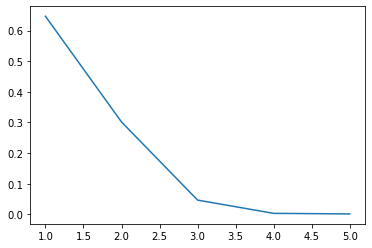

In [111]:
plt.plot(range(1,6), eigen)

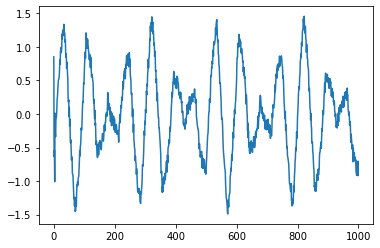

In [113]:

plt.plot(V[:,0])
plt.show()

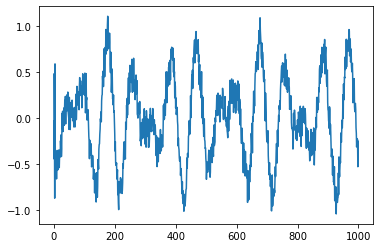

In [114]:
plt.plot(V[:,1])
plt.show()

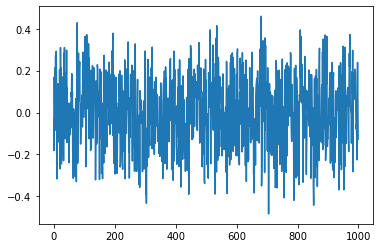

In [59]:
plt.plot(V[:,2])
plt.show()

### PCA on Iris Data

<Figure size 576x432 with 0 Axes>

Text(0.5, 0, 'Sepal length')

Text(0, 0.5, 'Sepal width')

(3.8, 8.4)

(1.5, 4.9)

([], [])

([], [])

C:\Users\mkhaw\AppData\Local\Temp/ipykernel_8440/1367415577.py:31: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=-150, azim=110)


Text(0.5, 0.92, 'First three PCA directions')

Text(0.5, 0, '1st eigenvector')

[Text(-4.0, 0, ''),
 Text(-3.0, 0, ''),
 Text(-2.0, 0, ''),
 Text(-1.0, 0, ''),
 Text(0.0, 0, ''),
 Text(1.0, 0, ''),
 Text(2.0, 0, ''),
 Text(3.0, 0, ''),
 Text(4.0, 0, ''),
 Text(5.0, 0, '')]

Text(0.5, 0, '2nd eigenvector')

[Text(-1.5, 0, ''),
 Text(-1.0, 0, ''),
 Text(-0.5, 0, ''),
 Text(0.0, 0, ''),
 Text(0.5, 0, ''),
 Text(1.0, 0, ''),
 Text(1.5, 0, ''),
 Text(2.0, 0, '')]

Text(0.5, 0, '3rd eigenvector')

[Text(-0.8, 0, ''),
 Text(-0.6000000000000001, 0, ''),
 Text(-0.4, 0, ''),
 Text(-0.19999999999999996, 0, ''),
 Text(0.0, 0, ''),
 Text(0.19999999999999996, 0, ''),
 Text(0.40000000000000013, 0, ''),
 Text(0.6000000000000001, 0, ''),
 Text(0.8, 0, ''),
 Text(1.0, 0, '')]

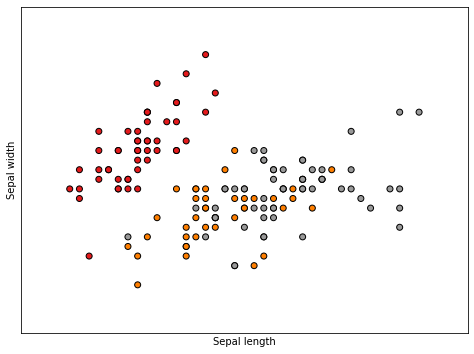

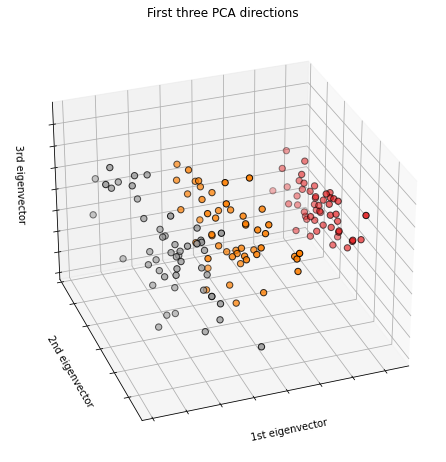

In [115]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [121]:
iris = datasets.load_iris()
X = iris.data[:50,:] 

In [117]:
X2 = X +0.05*np.random.rand(50,4)

In [122]:
X_combined = np.zeros((50,8))

In [123]:
X_combined[:,0:4] = X
X_combined[:,4:] = X2

In [124]:
X_combined

array([[5.1       , 3.5       , 1.4       , 0.2       , 5.12785274,
        3.50557383, 1.40982811, 0.23671595],
       [4.9       , 3.        , 1.4       , 0.2       , 4.93432235,
        3.01246452, 1.44427058, 0.22043607],
       [4.7       , 3.2       , 1.3       , 0.2       , 4.73077416,
        3.24668078, 1.32204686, 0.2352579 ],
       [4.6       , 3.1       , 1.5       , 0.2       , 4.64513792,
        3.10816812, 1.52133221, 0.22125589],
       [5.        , 3.6       , 1.4       , 0.2       , 5.00927024,
        3.60817195, 1.41421547, 0.24676155],
       [5.4       , 3.9       , 1.7       , 0.4       , 5.43224058,
        3.93814052, 1.74651581, 0.40500849],
       [4.6       , 3.4       , 1.4       , 0.3       , 4.631622  ,
        3.44569921, 1.43363739, 0.32554068],
       [5.        , 3.4       , 1.5       , 0.2       , 5.03987868,
        3.41344045, 1.53660348, 0.21050802],
       [4.4       , 2.9       , 1.4       , 0.2       , 4.44800059,
        2.94074584, 1.418220

In [125]:
X_combined.mean(axis=0)

array([5.006     , 3.428     , 1.462     , 0.246     , 5.03463295,
       3.4531315 , 1.48728524, 0.26982688])

In [126]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X_combined)
X_scaled  

array([[ 0.26938189,  0.19186974, -0.36063582, -0.44092382,  0.26604923,
         0.13977106, -0.44719676, -0.31574573],
       [-0.30377107, -1.14055903, -0.36063582, -0.44092382, -0.28628639,
        -1.17448049, -0.24834405, -0.47099066],
       [-0.87692403, -0.60758752, -0.9423065 , -0.44092382, -0.86721285,
        -0.55023942, -0.9539996 , -0.32964971],
       [-1.16350052, -0.87407328,  0.22103486, -0.44092382, -1.11161863,
        -0.91940803,  0.1965693 , -0.46317286],
       [-0.01719459,  0.4583555 , -0.36063582, -0.44092382, -0.07238516,
         0.41321902, -0.42186648, -0.21995093],
       [ 1.12911134,  1.25781276,  1.38437621,  1.47613628,  1.13477202,
         1.29266238,  1.49666114,  1.28909159],
       [-1.16350052, -0.07461601, -0.36063582,  0.51760623, -1.15019306,
        -0.0198088 , -0.30973452,  0.53128672],
       [-0.01719459, -0.07461601,  0.22103486, -0.44092382,  0.01497131,
        -0.10578593,  0.28473759, -0.56566455],
       [-1.73665348, -1.40704478

In [127]:
X_scaled.mean(axis=0)

array([ 1.87003191e-15, -2.20823360e-15, -1.17128529e-15,  9.17044218e-16,
        1.11383125e-15,  2.29816166e-15, -8.90398866e-16,  5.66213743e-16])

In [128]:
U,S,V = np.linalg.svd(X_scaled)
S

array([14.33670299, 10.1095916 ,  8.13632717,  5.0429009 ,  0.67463674,
        0.31613244,  0.19714945,  0.17462353])

In [129]:
eigen = S**2
eigen

array([2.05541053e+02, 1.02203842e+02, 6.61998198e+01, 2.54308495e+01,
       4.55134737e-01, 9.99397196e-02, 3.88679044e-02, 3.04933784e-02])

In [130]:
eigen = eigen/50
eigen = eigen/sum(eigen)

In [131]:
eigen = np.round(eigen*100)/100
print(eigen)

[0.51 0.26 0.17 0.06 0.   0.   0.   0.  ]


In [134]:
sum([0.51, 0.26, 0.17, 0.06])

1.0

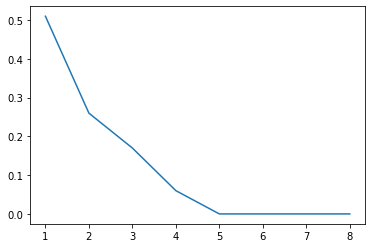

In [133]:
plt.plot(range(1, 9), eigen)

In [136]:
X_reduced = PCA(n_components=3).fit_transform(X_scaled)

Text(0.5, 1.0, 'Three blobs')

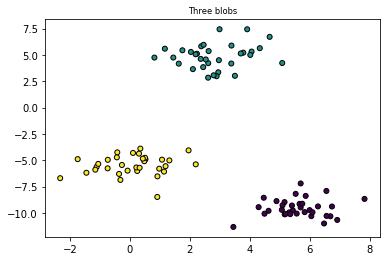

In [137]:
# https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203
# https://blog.floydhub.com/introduction-to-k-means-clustering-in-python-with-scikit-learn/
from sklearn.datasets import make_blobs
plt.title("Three blobs", fontsize='small')
X1, Y1 = make_blobs(n_features=2, centers=3, random_state=10)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

Text(0.5, 1.0, 'Data points and cluster centroids')

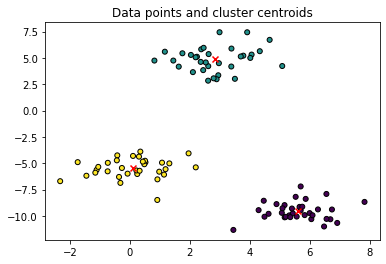

In [138]:
# Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans
    
# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=3, random_state=0).fit(X1)
# Get the cluster centroids

# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
    
plt.title('Data points and cluster centroids')
plt.show()

In [139]:
# https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

In [140]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html
# http://www.cse.psu.edu/~rtc12/CSE486/lecture15.pdf
# https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

## Evaluating Algorithms

In [141]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
Y = data.target

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [142]:
print(data.DESCR)
data.target_names

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

array(['malignant', 'benign'], dtype='<U9')

In [146]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [147]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
accuracy


LogisticRegression(random_state=0)

0.958041958041958

In [148]:
cm = confusion_matrix(Y_test, Y_pred)
cm
# tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
#TN, FP, FN, TP
# 


array([[50,  3],
       [ 3, 87]], dtype=int64)

In [150]:
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
tn
fp
fn
tp

50

3

3

87

In [ ]:
# 380 b
# 20 m

TN = 380
TP = 0

TN, FP, FN, TP

https://stackoverflow.com/questions/56078203/why-scikit-learn-confusion-matrix-is-reversed

[[True Negative, False Positive] 
[False Negative, True Positive]]

In [88]:
Y_pred
Y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0])

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [91]:

results = classification_report(Y_test, Y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        53
           1       0.97      0.97      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [ ]:
# precision measures how accurate our positive predictions were
# precision = tp / (tp+fp)

# recall measures what fraction of the positives our model identfied
# recall = tp / (tp+fn)

In [151]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy
cm = confusion_matrix(Y_test, Y_pred)
cm

KNeighborsClassifier()

0.951048951048951

array([[47,  6],
       [ 1, 89]], dtype=int64)

In [152]:
print(accuracy)

0.951048951048951


In [153]:
results = classification_report(Y_test, Y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        53
           1       0.94      0.99      0.96        90

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



In [155]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy
cm = confusion_matrix(Y_test, Y_pred)
cm

SVC(kernel='linear', random_state=0)

0.972027972027972

array([[51,  2],
       [ 2, 88]], dtype=int64)

In [156]:
results = classification_report(Y_test, Y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        53
           1       0.98      0.98      0.98        90

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [157]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy
cm = confusion_matrix(Y_test, Y_pred)
cm

SVC(random_state=0)

0.965034965034965

array([[50,  3],
       [ 2, 88]], dtype=int64)

In [158]:
results = classification_report(Y_test, Y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        53
           1       0.97      0.98      0.97        90

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.97      0.96       143



In [159]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy
cm = confusion_matrix(Y_test, Y_pred)
cm

GaussianNB()

0.916083916083916

array([[47,  6],
       [ 6, 84]], dtype=int64)

In [160]:
results = classification_report(Y_test, Y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        53
           1       0.93      0.93      0.93        90

    accuracy                           0.92       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143



In [162]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy
cm = confusion_matrix(Y_test, Y_pred)
cm

DecisionTreeClassifier(criterion='entropy', random_state=0)

0.958041958041958

array([[51,  2],
       [ 4, 86]], dtype=int64)

In [163]:
results = classification_report(Y_test, Y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        53
           1       0.98      0.96      0.97        90

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [164]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy
cm = confusion_matrix(Y_test, Y_pred)
cm

from sklearn.metrics import fbeta_score
output = fbeta_score(Y_test, Y_pred, average='macro', beta=0.5)
output

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

0.972027972027972

array([[52,  1],
       [ 3, 87]], dtype=int64)

0.9682719241542771

In [166]:
results = classification_report(Y_test, Y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        53
           1       0.99      0.97      0.98        90

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [167]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
accuracy
cm = confusion_matrix(Y_test, Y_pred)
cm

LogisticRegression(random_state=0)

0.9649122807017544

array([[45,  2],
       [ 2, 65]], dtype=int64)

In [168]:
from sklearn.metrics import classification_report
results = classification_report(Y_test, Y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       0.97      0.97      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [169]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(Y_test, Y_pred)


from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred)

<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic example')

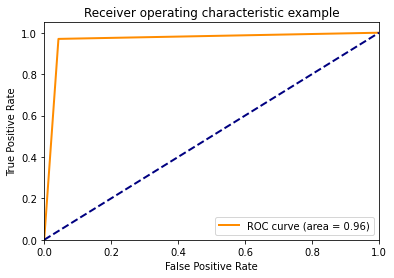

In [170]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

Ref: https://datascience-enthusiast.com/Python/ROC_Precision-Recall.html

In [ ]:
from sklearn.datasets import make_classification 
X, Y = make_classification(n_samples=100, n_features=4, weights = [0.90, 0.1], random_state=0)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
plt.figure(figsize = (20,10))
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.title('Lasso Logistic Regression ROC Curve', fontsize = 28)
plt.show();

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred)
plt.figure(figsize = (20,10))
plt.plot([0, 1], [0.01/0.98, 0.01/0.98], linestyle = '--')
plt.plot(recall, precision)
plt.xlabel('Recall', fontsize = 16)
plt.ylabel('Precision', fontsize = 16)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.title('Lasso Logistic Regression Precision-Recall Curve', fontsize = 28)
plt.show();

In [171]:
len(data.target)

569

In [172]:
sum(data.target)

357

In [173]:
569-357

212

In [174]:
212/569

0.37258347978910367